In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install fastai
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle competitions download -c histopathologic-cancer-detection

In [0]:
from fastai.vision import *

In [5]:
!ls

kaggle.json  sample_submission.csv.zip	train_labels.csv.zip
sample_data  test.zip			train.zip


In [0]:
!unzip -q train.zip -d train
!rm train.zip
!unzip -q train_labels.csv.zip

In [7]:
ds_tfms=get_transforms(do_flip=True, flip_vert=True, max_lighting=0.1, max_warp=0.)
data = ImageDataBunch.from_csv('', folder='train', size=112, suffix='.tif', csv_labels='train_labels.csv', test = 'test')
data.normalize()

ImageDataBunch;

Train: LabelList (176020 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
0,1,0,0,0
Path: .;

Valid: LabelList (44005 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
0,0,0,1,0
Path: .;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: .

In [8]:
pd.read_csv('train_labels.csv').head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [10]:
#learn = create_cnn(data, models.resnet101, metrics=[accuracy])
learn = create_cnn(data, models.densenet121, metrics=[accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.221886,0.195089,0.925168,16:21
1,0.172413,0.153140,0.942893,16:16
2,0.133051,0.126985,0.952869,16:20
3,0.113250,0.116332,0.957687,15:55
4,0.103322,0.116019,0.959141,15:53


In [0]:
learn.save('freez')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


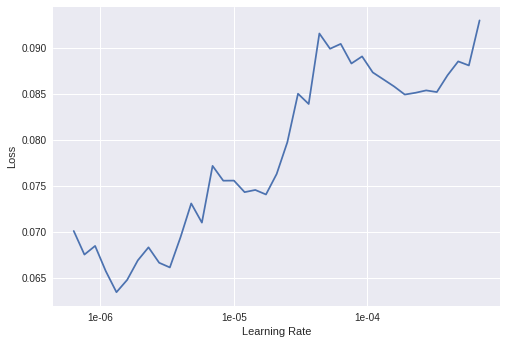

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.083205,0.114342,0.959255,20:56
1,0.078115,0.113367,0.959505,20:33


In [15]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 56, 56]         9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
MaxPool2d            [64, 28, 28]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 28, 28]         128        True      
______________________________________________________________________
ReLU                 [64, 28, 28]         0          False     
______________________________________________________________________
Conv2d               [128, 28, 28]        8,192      True      
______________________________________________________________